In [1]:
import pandas as pd
db = pd.read_csv('diabetes.csv')
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
missing_values = db.isnull().sum()
print(missing_values)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


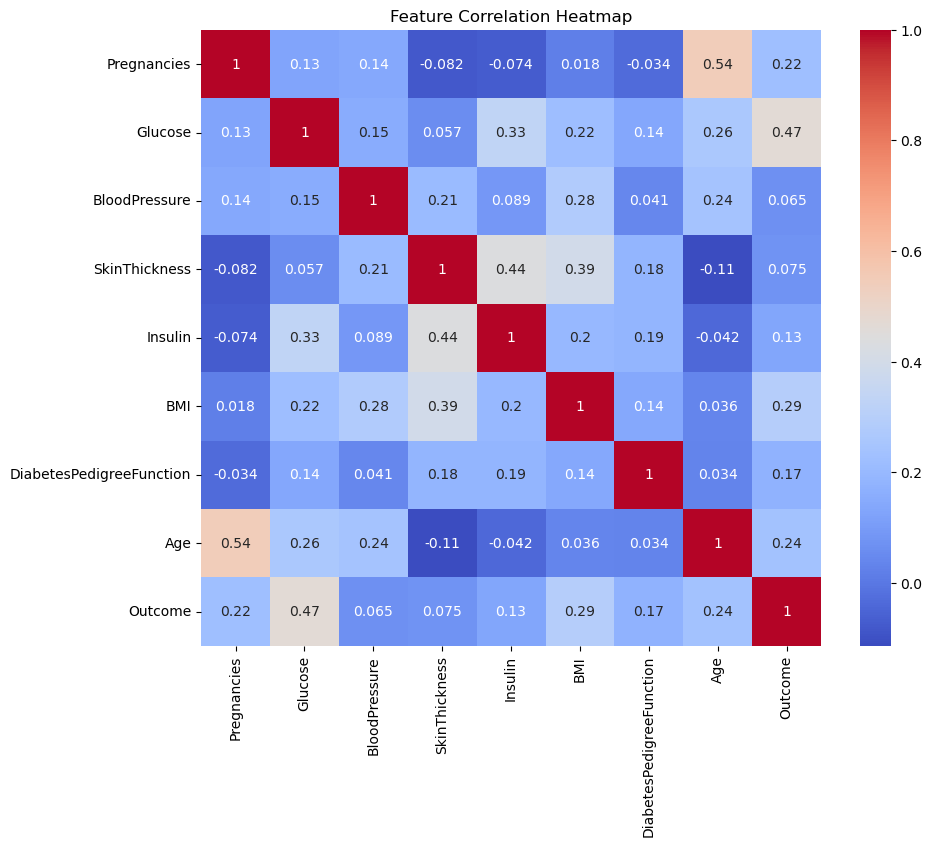

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called 'df'
# Replace 'df' with the actual variable name of your dataset if different

# Compute the correlation matrix
corr_matrix = db.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()


In [4]:
nan_values = db.isnull().sum()
print('count of nan values in each column')
nan_values

count of nan values in each column


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:

import pandas as pd

# Assuming you already have a dataframe 'df' from your dataset
# Set your target variable 'y' to the 'outcome' column
y = db['Outcome']

# Set your input variables 'X' to the rest of the 8 columns
X = db.drop(columns=['Outcome'])  # This will drop the target column and keep the rest as input

# Display the shapes to confirm
print("Shape of X (input variables):", X.shape)
print("Shape of y (target variable):", y.shape)


Shape of X (input variables): (768, 8)
Shape of y (target variable): (768,)


In [6]:
from sklearn.preprocessing import StandardScaler


In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on X and transform the data
X_scaled = scaler.fit_transform(X)

# You can now use X_scaled for training your model
print("First 5 rows of the scaled input variables:")
print(X_scaled[:5])


First 5 rows of the scaled input variables:
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Perceptron 
from sklearn import metrics 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
import numpy as np

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train(data):", x_train.shape)
print("Test(data):", x_test.shape)
print("Train(target):", y_train.shape)
print("Test(target):", y_test.shape)

Train(data): (614, 8)
Test(data): (154, 8)
Train(target): (614,)
Test(target): (154,)


In [21]:
class Perceptron:
    def __init__(self, LR=0.01, epochs=100):
        self.LR = LR
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])

        self.errors = []

        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                up = self.LR * (target - self.predict(xi))
               
                self.weights[1:] += up * xi
                self.weights[0] += up
                error += int(up != 0.0)

            self.errors.append(error)


        return self
        print(self.errors)
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)



In [22]:

perceptron = Perceptron(LR=0.01, epochs=100)
perceptron.fit(x_train, y_train)

In [23]:
y_pred = perceptron.predict(x_test)

In [24]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 70.78%


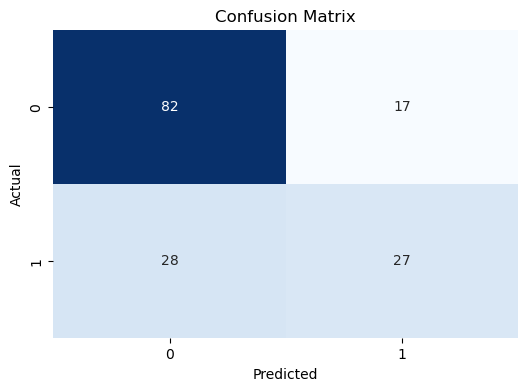

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
